In [72]:
from sys import argv
import pandas as pd
import yfinance as yf
import mplfinance as mpf
import sqlite3
import warnings
warnings.simplefilter("ignore")
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [114]:
btc = yf.download('BTC-USD', start = "2010-07-10", end = "2022-11-24")

[*********************100%***********************]  1 of 1 completed


In [104]:
#btc = pd.read_csv('../dataset/Dataframes_clean/df2.csv')

In [115]:
btc = btc.reset_index()

In [125]:
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [118]:
training_set = btc.iloc[:2000, 1:2].values
test_set = btc.iloc[2000:, 1:2].values

In [119]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(1940, 60, 1)

In [120]:
X_train.shape

(1940, 60, 1)

In [121]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 24, batch_size = 32)

Epoch 1/24
61/61 [==============================] - 10s 61ms/step - loss: 0.0075
Epoch 2/24
61/61 [==============================] - 4s 62ms/step - loss: 0.0034
Epoch 3/24
61/61 [==============================] - 4s 65ms/step - loss: 0.0029
Epoch 4/24
61/61 [==============================] - 4s 64ms/step - loss: 0.0027
Epoch 5/24
61/61 [==============================] - 4s 66ms/step - loss: 0.0022
Epoch 6/24
61/61 [==============================] - 4s 62ms/step - loss: 0.0023
Epoch 7/24
61/61 [==============================] - 4s 70ms/step - loss: 0.0023
Epoch 8/24
61/61 [==============================] - 5s 77ms/step - loss: 0.0021
Epoch 9/24
61/61 [==============================] - 5s 82ms/step - loss: 0.0023
Epoch 10/24
61/61 [==============================] - 5s 79ms/step - loss: 0.0019
Epoch 11/24
61/61 [==============================] - 5s 79ms/step - loss: 0.0015
Epoch 12/24
61/61 [==============================] - 5s 76ms/step - loss: 0.0018
Epoch 13/24
61/61 [=================

In [124]:
real_btc_price = test_set

In [127]:
dataset_train = btc.iloc[:2000, 1:2]
dataset_test = btc.iloc[2000:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

In [128]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [129]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, newshape = (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(990, 60, 1)


In [130]:
predicted_btc_price = model.predict(X_test)

31/31 [==============================] - 4s 23ms/step


In [131]:
predicted_btc_price = sc.inverse_transform(predicted_btc_price)


In [111]:
# Getting the predicted stock price of 2017
dataset_train = btc.iloc[:800, 1:2]
dataset_test = btc.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [112]:
predicted_btc_price = model.predict(X_test)
predicted_btc_price = sc.inverse_transform(predicted_btc_price)

15/15 [==============================] - 2s 28ms/step


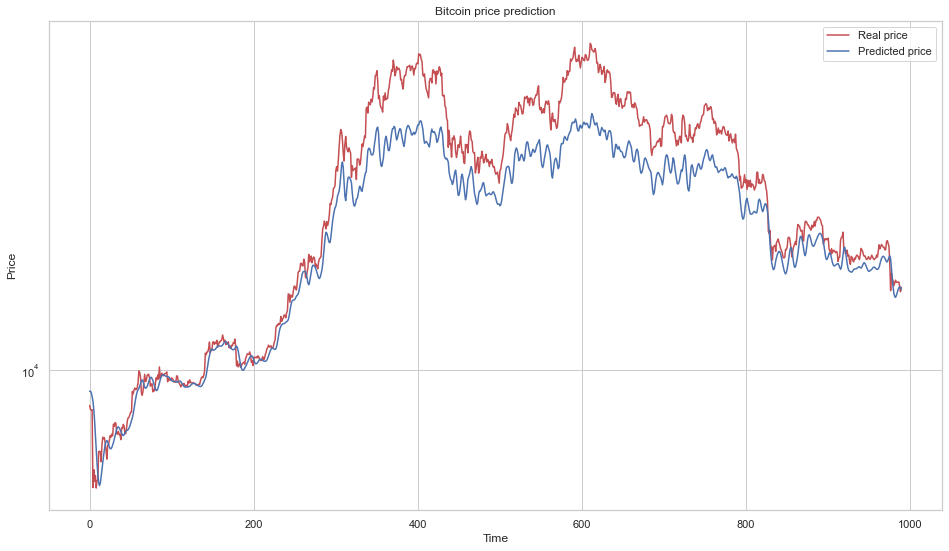

In [134]:
plt.plot(real_btc_price, color = "r", label = 'Real price')
plt.plot(predicted_btc_price, color = "b", label = 'Predicted price')
plt.title('Bitcoin price prediction')
plt.xlabel('Time')
plt.yscale('log')
plt.ylabel('Price')
plt.legend()
plt.show()

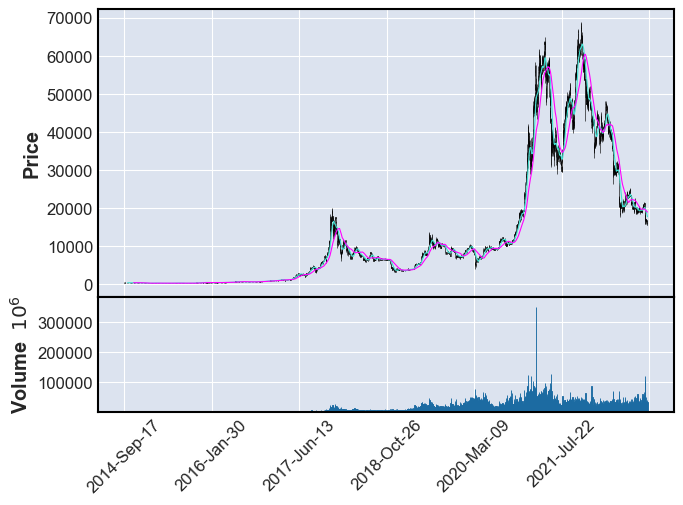

In [116]:
mpf.plot(btc, type = 'candle', mav=(21,55), volume = True)

[*********************100%***********************]  1 of 1 completed


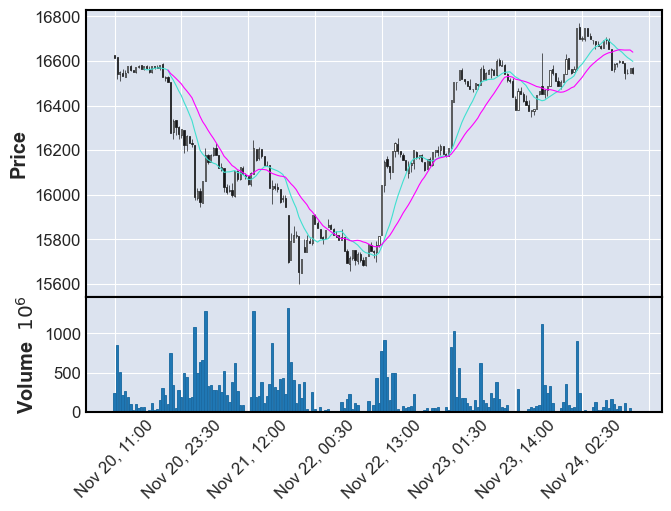

In [117]:
intraday_btc = yf.download(tickers= 'BTC-USD', period = "5d", interval = "30m")
iday_btc = intraday_btc.loc["2022-11-20 11:00":"2022-11-24 12:00", :]
mpf.plot(iday_btc, type="candle", mav=(12, 21), volume = True)

[*********************100%***********************]  1 of 1 completed


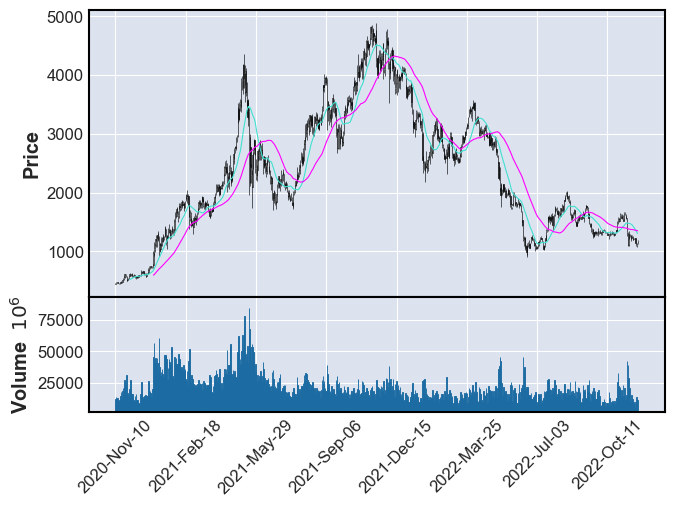

In [118]:
eth = yf.download('ETH-USD', start = "2020-11-10", end = "2022-11-24")
mpf.plot(eth, type = 'candle', mav=(21,55), volume = True)